# Beans Dataset

Contains images of beans taken in the bield using smartphone cameras.

Consist of 3 classes:
* 2 Disease class (Angular Leaf Spot and Bean Rust)
* 1 Healty class

https://www.tensorflow.org/datasets/catalog/beans

In [1]:
#Import libraries
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import zipfile

print(tf.__version__)

'2.10.0'

## Downloading Beans Dataset

https://github.com/AI-Lab-Makerere/ibean/

In [2]:
# !curl https://storage.googleapis.com/ibeans/train.zip -o train.zip
# !curl https://storage.googleapis.com/ibeans/validation.zip -o valid.zip
# !curl https://storage.googleapis.com/ibeans/test.zip -o test.zip

In [3]:
for each_sets in ["train.zip", "valid.zip", "test.zip"]:
    zip_ref = zipfile.ZipFile(each_sets, "r")
    zip_ref.extractall("./datasets/")

## Exploring Directories

In [4]:
import os

for dirpath, dirnames, filenames in os.walk("datasets"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'datasets'.
There are 3 directories and 0 images in 'datasets\test'.
There are 0 directories and 43 images in 'datasets\test\angular_leaf_spot'.
There are 0 directories and 43 images in 'datasets\test\bean_rust'.
There are 0 directories and 42 images in 'datasets\test\healthy'.
There are 3 directories and 0 images in 'datasets\train'.
There are 0 directories and 345 images in 'datasets\train\angular_leaf_spot'.
There are 0 directories and 348 images in 'datasets\train\bean_rust'.
There are 0 directories and 342 images in 'datasets\train\healthy'.
There are 3 directories and 0 images in 'datasets\validation'.
There are 0 directories and 44 images in 'datasets\validation\angular_leaf_spot'.
There are 0 directories and 45 images in 'datasets\validation\bean_rust'.
There are 0 directories and 44 images in 'datasets\validation\healthy'.


## Getting class names from directory

In [5]:
import pathlib

data_dir = pathlib.Path("./datasets/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories

print(class_names)

['angular_leaf_spot' 'bean_rust' 'healthy']


## Viewing random Images

In [6]:
import helper_functions

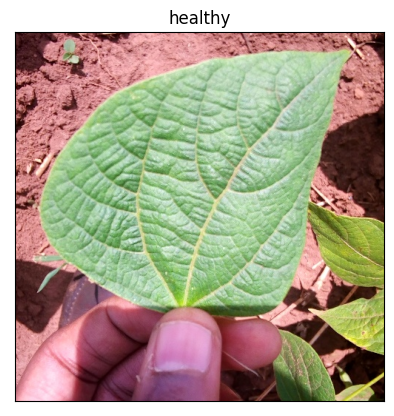

In [7]:
# View a random image from the training dataset
img = helper_functions.view_random_image(target_dir="./datasets/train/",
                        target_class="healthy")

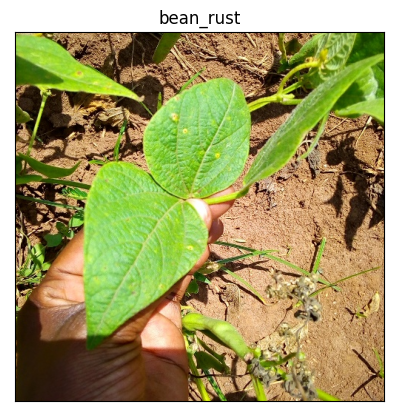

In [8]:
# View a random image from the training dataset
img = helper_functions.view_random_image(target_dir="./datasets/train/",
                        target_class="bean_rust")

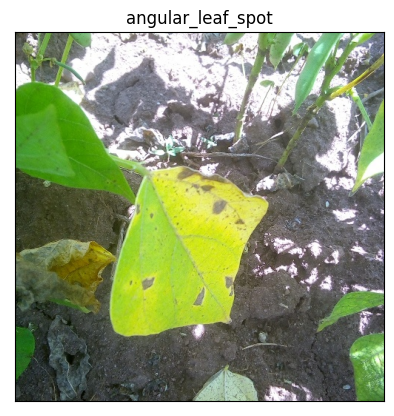

In [9]:
# View a random image from the training dataset
img = helper_functions.view_random_image(target_dir="./datasets/train/",
                        target_class="angular_leaf_spot")

In [10]:
from helper_functions import view_random_image_per_class

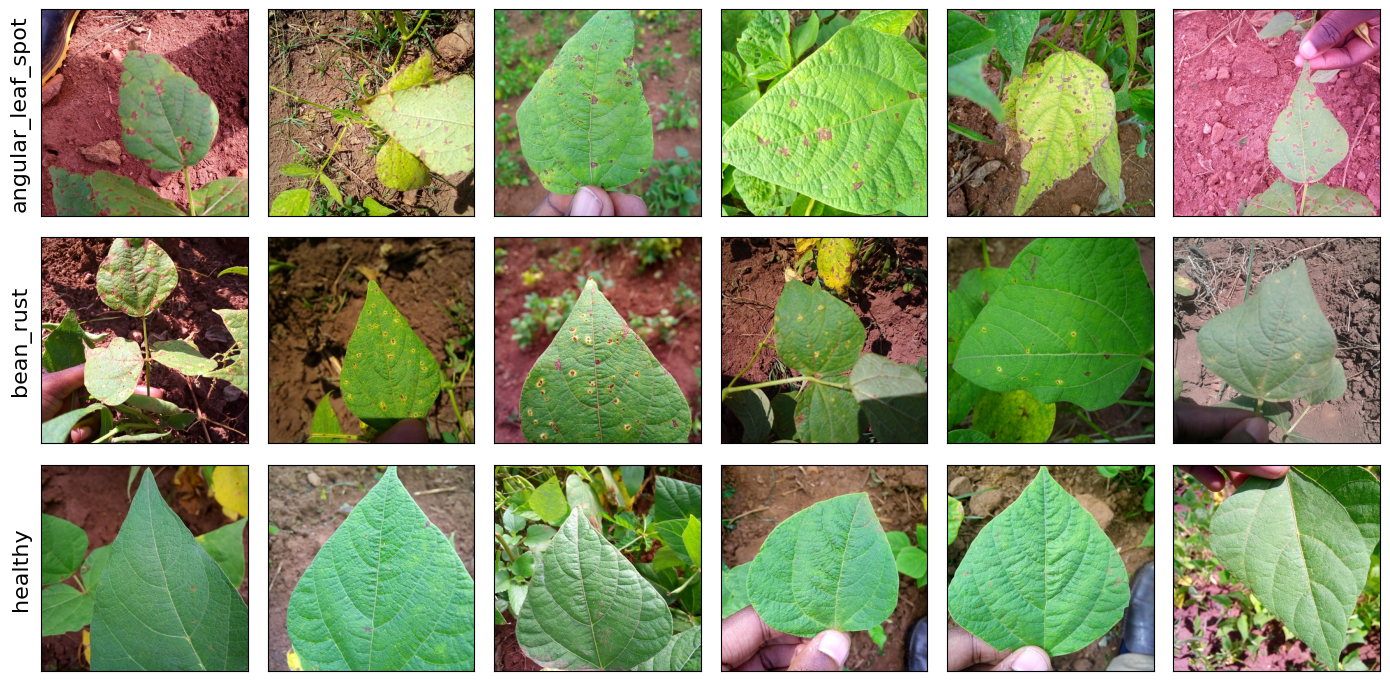

In [11]:
view_random_image_per_class(classes=class_names)

## Importing Images using ImageDataGenerator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                  horizontal_flip=True,
                                  zoom_range=0.3,
                                  rotation_range=0.3,
                                  shear_range=0.3
                                  )

valid_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [13]:
TRAIN_PATH = "./datasets/train/"
train_dataset = train_datagen.flow_from_directory(TRAIN_PATH)

VALID_PATH = "./datasets/validation/"
valid_dataset = valid_datagen.flow_from_directory(VALID_PATH)

TEST_PATH = "./datasets/test/"
test_dataset = test_datagen.flow_from_directory(TEST_PATH)

train_dataset, valid_dataset, test_dataset

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


(<keras.preprocessing.image.DirectoryIterator at 0x22fb7f9adc0>,
 <keras.preprocessing.image.DirectoryIterator at 0x22fb7f9aa00>)

In [14]:
# example_image, example_labels = next(train_dataset)
# # example_image, example_labels

In [15]:
# fig, axs = plt.subplots(3, 6, figsize=(20, 10))

# for each_row in axs:
#     for index, each_column in enumerate(each_row):
#         each_column.imshow(example_image[index])
#         each_column.set_title(class_names[example_labels[index].argmax()])
#         each_column.axis(False)
        
# plt.tight_layout()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[256, 256, 3], name="input_layer"),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer="adam",
             metrics=["accuracy"])

model.fit(train_dataset, epochs=100, validation_data=valid_dataset, 
          steps_per_epoch=int( len(train_dataset) * 0.3), 
          validation_steps=len(valid_dataset),
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
9/9 [==============================] - 8s 629ms/step - loss: 25.4599 - accuracy: 0.3571 - val_loss: 5.5991 - val_accuracy: 0.5263
Epoch 2/100
9/9 [==============================] - 5s 509ms/step - loss: 5.7040 - accuracy: 0.4361 - val_loss: 3.3692 - val_accuracy: 0.4962
Epoch 3/100
9/9 [==============================] - 5s 519ms/step - loss: 1.9669 - accuracy: 0.5868 - val_loss: 2.5331 - val_accuracy: 0.5489
Epoch 4/100
9/9 [==============================] - 5s 532ms/step - loss: 1.2812 - accuracy: 0.5972 - val_loss: 1.4401 - val_accuracy: 0.5865
Epoch 5/100
9/9 [==============================] - 4s 465ms/step - loss: 1.0556 - accuracy: 0.5865 - val_loss: 1.1428 - val_accuracy: 0.6015
Epoch 6/100
9/9 [==============================] - 5s 509ms/step - loss: 1.3833 - accuracy: 0.6042 - val_loss: 1.2650 - val_accuracy: 0.6316
Epoch 7/100
9/9 [==============================] - 4s 474ms/step - loss: 1.7633 - accuracy: 0.5000 - val_loss: 3.1687 - val_accuracy: 0.3684
Epoch 8/100


In [17]:
model.evaluate(test_dataset)

4/4 [==============================] - 1s 179ms/step - loss: 0.6043 - accuracy: 0.7578


[0.6042900085449219, 0.7578125]

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[256, 256, 3], name="input_layer"),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer="adam",
             metrics=["accuracy"])

model.fit(train_dataset, epochs=100, validation_data=valid_dataset, 
          steps_per_epoch=int( len(train_dataset) * 0.3), 
          validation_steps=len(valid_dataset),
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
9/9 [==============================] - 6s 491ms/step - loss: 13.4411 - accuracy: 0.4098 - val_loss: 2.1035 - val_accuracy: 0.3534
Epoch 2/100
9/9 [==============================] - 4s 489ms/step - loss: 1.1680 - accuracy: 0.4028 - val_loss: 1.0686 - val_accuracy: 0.4286
Epoch 3/100
9/9 [==============================] - 4s 474ms/step - loss: 1.0714 - accuracy: 0.4271 - val_loss: 1.0891 - val_accuracy: 0.3308
Epoch 4/100
9/9 [==============================] - 4s 490ms/step - loss: 1.0308 - accuracy: 0.4410 - val_loss: 0.9920 - val_accuracy: 0.5639
Epoch 5/100
9/9 [==============================] - 4s 487ms/step - loss: 0.9335 - accuracy: 0.6042 - val_loss: 0.8558 - val_accuracy: 0.5940
Epoch 6/100
9/9 [==============================] - 4s 486ms/step - loss: 0.8720 - accuracy: 0.6285 - val_loss: 0.7796 - val_accuracy: 0.6692
Epoch 7/100
9/9 [==============================] - 4s 477ms/step - loss: 0.8840 - accuracy: 0.6181 - val_loss: 0.7798 - val_accuracy: 0.6992
Epoch 8/100


In [19]:
model.evaluate(test_dataset)

4/4 [==============================] - 0s 84ms/step - loss: 0.5323 - accuracy: 0.7891


[0.5322810411453247, 0.7890625]

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[256, 256, 3], name="input_layer"),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.Conv2D(filters=32, activation="relu", kernel_size=3),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer="adam",
             metrics=["accuracy"])

model.fit(train_dataset, epochs=100, validation_data=valid_dataset, 
          steps_per_epoch=int( len(train_dataset) * 0.3), 
          validation_steps=len(valid_dataset),
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
9/9 [==============================] - 7s 501ms/step - loss: 2.5535 - accuracy: 0.3308 - val_loss: 1.1019 - val_accuracy: 0.3383
Epoch 2/100
9/9 [==============================] - 5s 537ms/step - loss: 1.0760 - accuracy: 0.4861 - val_loss: 1.0417 - val_accuracy: 0.5789
Epoch 3/100
9/9 [==============================] - 4s 522ms/step - loss: 1.0419 - accuracy: 0.5188 - val_loss: 1.1582 - val_accuracy: 0.3759
Epoch 4/100
9/9 [==============================] - 5s 530ms/step - loss: 1.0129 - accuracy: 0.5139 - val_loss: 1.0208 - val_accuracy: 0.3910
Epoch 5/100
9/9 [==============================] - 5s 515ms/step - loss: 0.9060 - accuracy: 0.5938 - val_loss: 0.7797 - val_accuracy: 0.6316
Epoch 6/100
9/9 [==============================] - 5s 510ms/step - loss: 0.8651 - accuracy: 0.6424 - val_loss: 0.7670 - val_accuracy: 0.5940
Epoch 7/100
9/9 [==============================] - 6s 622ms/step - loss: 0.8945 - accuracy: 0.5868 - val_loss: 0.8928 - val_accuracy: 0.5639
Epoch 8/100
9

In [21]:
model.evaluate(valid_dataset)

5/5 [==============================] - 0s 66ms/step - loss: 0.5426 - accuracy: 0.7293


[0.5426134467124939, 0.7293233275413513]

In [22]:
model.evaluate(valid_dataset)

5/5 [==============================] - 0s 66ms/step - loss: 0.5426 - accuracy: 0.7293


[0.5426133871078491, 0.7293233275413513]

## Transfer Learning

In [23]:
import tensorflow_hub as hub

In [24]:
feature_vector = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5", input_shape=[256, 256, 3])

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[256, 256, 3]),
    feature_vector,
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer="adam",
             metrics=["accuracy"])

model.fit(train_dataset, epochs=100, validation_data=valid_dataset, 
          steps_per_epoch=int( len(train_dataset) * 0.3), 
          validation_steps=len(valid_dataset),
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
9/9 [==============================] - 12s 655ms/step - loss: 1.1491 - accuracy: 0.4410 - val_loss: 0.9303 - val_accuracy: 0.5639
Epoch 2/100
9/9 [==============================] - 5s 518ms/step - loss: 0.7914 - accuracy: 0.6562 - val_loss: 0.7501 - val_accuracy: 0.7143
Epoch 3/100
9/9 [==============================] - 5s 523ms/step - loss: 0.6581 - accuracy: 0.7153 - val_loss: 0.6314 - val_accuracy: 0.7519
Epoch 4/100
9/9 [==============================] - 4s 482ms/step - loss: 0.6871 - accuracy: 0.7256 - val_loss: 0.5766 - val_accuracy: 0.8120
Epoch 5/100
9/9 [==============================] - 5s 533ms/step - loss: 0.5342 - accuracy: 0.7535 - val_loss: 0.5054 - val_accuracy: 0.8045
Epoch 6/100
9/9 [==============================] - 4s 526ms/step - loss: 0.4996 - accuracy: 0.7857 - val_loss: 0.4957 - val_accuracy: 0.8647
Epoch 7/100
9/9 [==============================] - 4s 488ms/step - loss: 0.4338 - accuracy: 0.8120 - val_loss: 0.4472 - val_accuracy: 0.8872
Epoch 8/100


Epoch 59/100
9/9 [==============================] - 5s 498ms/step - loss: 0.1733 - accuracy: 0.9444 - val_loss: 0.2200 - val_accuracy: 0.9474
Epoch 60/100
9/9 [==============================] - 4s 529ms/step - loss: 0.1840 - accuracy: 0.9436 - val_loss: 0.2008 - val_accuracy: 0.9474
Epoch 61/100
9/9 [==============================] - 4s 461ms/step - loss: 0.1897 - accuracy: 0.9436 - val_loss: 0.2085 - val_accuracy: 0.9398
Epoch 62/100
9/9 [==============================] - 5s 497ms/step - loss: 0.1728 - accuracy: 0.9479 - val_loss: 0.2232 - val_accuracy: 0.9549
Epoch 63/100
9/9 [==============================] - 4s 461ms/step - loss: 0.1646 - accuracy: 0.9511 - val_loss: 0.2090 - val_accuracy: 0.9549
Epoch 64/100
9/9 [==============================] - 5s 517ms/step - loss: 0.1391 - accuracy: 0.9618 - val_loss: 0.1988 - val_accuracy: 0.9549
Epoch 65/100
9/9 [==============================] - 5s 501ms/step - loss: 0.2422 - accuracy: 0.8958 - val_loss: 0.2179 - val_accuracy: 0.9474
Epoch 

In [26]:
model.evaluate(valid_dataset)

5/5 [==============================] - 1s 83ms/step - loss: 0.1752 - accuracy: 0.9624


[0.1751757264137268, 0.9624060392379761]

In [35]:
model.layers[0].trainable = True 

# for each_layer in model.layers[0].layers[-10:]:
#     each_layer.trainable = True
    

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

model.fit(train_dataset, epochs=50, validation_data=valid_dataset, 
          steps_per_epoch=int( len(train_dataset) * 0.3), 
          validation_steps=len(valid_dataset),
                              callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/50
9/9 [==============================] - 14s 724ms/step - loss: 0.4509 - accuracy: 0.9306 - val_loss: 0.4726 - val_accuracy: 0.9248
Epoch 2/50
9/9 [==============================] - 5s 500ms/step - loss: 0.4547 - accuracy: 0.9375 - val_loss: 0.5083 - val_accuracy: 0.9398
Epoch 3/50
9/9 [==============================] - 5s 505ms/step - loss: 0.4191 - accuracy: 0.9514 - val_loss: 0.5303 - val_accuracy: 0.9398
Epoch 4/50
9/9 [==============================] - 5s 500ms/step - loss: 0.4102 - accuracy: 0.9514 - val_loss: 0.5828 - val_accuracy: 0.9173
Epoch 5/50
9/9 [==============================] - 5s 507ms/step - loss: 0.3917 - accuracy: 0.9618 - val_loss: 0.6723 - val_accuracy: 0.8947
Epoch 6/50
9/9 [==============================] - 5s 543ms/step - loss: 0.3813 - accuracy: 0.9514 - val_loss: 0.8560 - val_accuracy: 0.8797


In [36]:
model.evaluate(valid_dataset)

5/5 [==============================] - 1s 88ms/step - loss: 0.4727 - accuracy: 0.9248


[0.47268471121788025, 0.9248120188713074]